In [1]:
! if [ ! -e rmf_tool ]; then git clone https://github.com/ngast/rmf_tool.git; fi

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import rmf_tool.src.rmf_tool as rmf
np.random.seed(1) # to ensure reproducibility 

## Homogeneous SIS Model Setup for DDPP class

In [3]:
ddpp = rmf.DDPP()

# set transitions of the model
ddpp.add_transition([-1,1], lambda x: alpha*x[0])
ddpp.add_transition([-1,1], lambda x: beta*x[0]*x[1])
ddpp.add_transition([1,-1], lambda x: gamma*x[1])

# set initial state of the model
ddpp.set_initial_state([1,0])

### Simulations

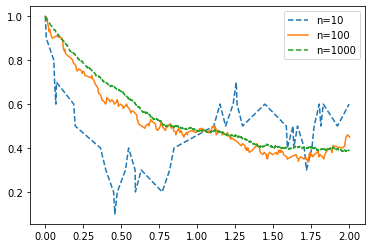

In [4]:
# specifying alpha, beta, gamma from the transition rates
alpha,beta,gamma=1,1,1

# simulation for populations of size n=10, 100, 1000 
for n in [10, 100, 1000]:
    t,X = ddpp.simulate(N=n, time=2)
    # plot trajectory
    plt.plot(t,X[:,0], ('-' if n==100 else '--'), label='n={}'.format(n))
plt.legend()
plt.savefig('SIS.pdf', bbox_inches='tight')
plt.show()

### Simulations and Mean Field Approximation 

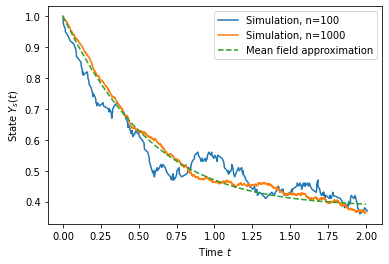

In [5]:
# plot simulations with population size n = 100, 1000 against the solution of the mean field approximation
time = 2

for n in [100, 1000]:
    t, X = ddpp.simulate(N=n, time=time)
    plt.plot(t,X[:,0],'-', label='Simulation, n={}'.format(n))

t, X = ddpp.ode(time=time)
plt.plot(t,X[:,0], '--', label="Mean field approximation")


plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('State $Y_s(t)$')
plt.show()

In [6]:
t, x, v, xvw = ddpp.meanFieldExpansionTransient(order=1)
#w = (xvw[:,4:].reshape(-1,2,2))
x_inf, v_inf,_ = ddpp.meanFieldExpansionSteadyState(order=1)
for n in [10, 20, 30]:
    x_simu, conf = ddpp.steady_state_simulation(N=n, time=20000)
    print('{}&{:1.3f} & {:1.3f} & ${:1.3f}\\pm{:1.3f}$\\\\'.format(n, x_inf[0], x_inf[0]+1/n*v_inf[0], x_simu[0], conf[0]))

time to compute drift= 0.10123920440673828
10&0.382 & 0.394 & $0.393\pm0.004$\\
20&0.382 & 0.388 & $0.387\pm0.002$\\
30&0.382 & 0.386 & $0.386\pm0.002$\\
